In [57]:
#import netCDF4 as nc
import xarray
import pandas as pd


In [58]:
uebb = xarray.open_dataset('UEBB_v1.nc')

In [59]:
uebb

<xarray.Dataset>
Dimensions:                 (Time: 52560, Height: 5, Turbine: 32)
Coordinates:
  * Time                    (Time) datetime64[ns] 2013-08-01 ... 2014-07-31T2...
  * Height                  (Height) float64 10.0 40.0 60.0 80.0 100.0
  * Turbine                 (Turbine) float64 1.0 2.0 3.0 4.0 ... 30.0 31.0 32.0
Data variables: (12/40)
    wind_speed              (Height, Time) float64 ...
    wind_direction          (Height, Time) float64 ...
    wind_speed_std          (Height, Time) float64 ...
    wind_direction_std      (Height, Time) float64 ...
    wind_speed_max          (Height, Time) float64 ...
    wind_speed_min          (Height, Time) float64 ...
    ...                      ...
    UST_flag                (Time) float64 ...
    HS                      (Time) float64 ...
    HS_flag                 (Time) float64 ...
    TKE                     (Time) float64 ...
    LMO                     (Time) float64 ...
    ws_w_corrected          (Time) float64 ...
Attributes:
    title:         UEBB Dataset
    long_title:    Beberibe Wind Farm (UEBB) Experimental Dataset with a full...
    comments:      Contact: yoshi@ifsc.edu.br
    institution:   Federal Univeristy of Santa Catarina, Brazil
    CreationDate:  July 2017
    CreatedBy:     Pedro Santos
    start_time:    01-Aug-2013 00:00
    end_time:      31-Jul-2014 23:50

In [60]:
uebb = uebb.to_dataframe()
uebb

wind_speed  wind_direction  \
Time                Height Turbine                               
2013-08-01 00:00:00 10.0   1.0             NaN             NaN   
                           2.0             NaN             NaN   
                           3.0             NaN             NaN   
                           4.0             NaN             NaN   
                           5.0             NaN             NaN   
...                                        ...             ...   
2014-07-31 23:50:00 100.0  28.0          10.34           107.3   
                           29.0          10.34           107.3   
                           30.0          10.34           107.3   
                           31.0          10.34           107.3   
                           32.0          10.34           107.3   

                                    wind_speed_std  wind_direction_std  \
Time                Height Turbine                                       
2013-08-01 00:00:00 10.0   1.0                 NaN                 NaN   
                           2.0                 NaN                 NaN   
                           3.0                 NaN                 NaN   
                           4.0                 NaN                 NaN   
                           5.0                 NaN                 NaN   
...                                            ...                 ...   
2014-07-31 23:50:00 100.0  28.0              0.727                2.61   
                           29.0              0.727                2.61   
                           30.0              0.727                2.61   
                           31.0              0.727                2.61   
                           32.0              0.727                2.61   

                                    wind_speed_max  wind_speed_min  \
Time                Height Turbine                                   
2013-08-01 00:00:00 10.0   1.0                 NaN             NaN   
                           2.0                 NaN             NaN   
                           3.0                 NaN             NaN   
                           4.0                 NaN             NaN   
                           5.0                 NaN             NaN   
...                                            ...             ...   
2014-07-31 23:50:00 100.0  28.0              11.54           7.552   
                           29.0              11.54           7.552   
                           30.0              11.54           7.552   
                           31.0              11.54           7.552   
                           32.0              11.54           7.552   

                                    wind_speed_cube  air_temperature  \
Time                Height Turbine                                     
2013-08-01 00:00:00 10.0   1.0                  NaN              NaN   
                           2.0                  NaN              NaN   
                           3.0                  NaN              NaN   
                           4.0                  NaN              NaN   
                           5.0                  NaN              NaN   
...                                             ...              ...   
2014-07-31 23:50:00 100.0  28.0              1120.3           298.41   
                           29.0              1120.3           298.41   
                           30.0              1120.3           298.41   
                           31.0              1120.3           298.41   
                           32.0              1120.3           298.41   

                                    relative_humidity  air_pressure  ...  \
Time                Height Turbine                                   ...   
2013-08-01 00:00:00 10.0   1.0                    NaN        1009.2  ...   
                           2.0                    NaN        1009.2  ...   
                           3.0                    NaN        1

In [61]:
uebb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8409600 entries, (Timestamp('2013-08-01 00:00:00'), 10.0, 1.0) to (Timestamp('2014-07-31 23:50:00'), 100.0, 32.0)
Data columns (total 40 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   wind_speed              float64
 1   wind_direction          float64
 2   wind_speed_std          float64
 3   wind_direction_std      float64
 4   wind_speed_max          float64
 5   wind_speed_min          float64
 6   wind_speed_cube         float64
 7   air_temperature         float64
 8   relative_humidity       float64
 9   air_pressure            float64
 10  logger_temperature      float64
 11  battery_V               float64
 12  ws_u                    float64
 13  ws_v                    float64
 14  ws_w                    float64
 15  sonic_temperature       float64
 16  sonic_wind_speed        float64
 17  sonic_wind_direction    float64
 18  tilt_X                  float64
 19  tilt_Y               

In [62]:
uebb = uebb.reset_index()
uebb = uebb.set_index("Time")
uebb.index = pd.to_datetime(uebb.index)
uebb

,Height,Turbine,wind_speed,wind_direction,wind_speed_std,wind_direction_std,wind_speed_max,wind_speed_min,wind_speed_cube,air_temperature,...,active_power_total_min,act_position,air_density,UST,UST_flag,HS,HS_flag,TKE,LMO,ws_w_corrected
Time,,,,,,,,,,,,,,,,,,,,,
2013-08-01 00:00:00,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,10.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,582.0,132.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,462.0,103.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,347.0,117.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,327.0,91.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-31 23:50:00,100.0,28.0,10.34,107.3,0.727,2.61,11.54,7.552,1120.3,298.41,...,387.0,-226.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236
2014-07-31 23:50:00,100.0,29.0,10.34,107.3,0.727,2.61,11.54,7.552,1120.3,298.41,...,447.0,-231.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236
2014-07-31 23:50:00,100.0,30.0,10.34,107.3,0.727,2.61,11.54,7.552,1120.3,298.41,...,438.0,469.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236


In [63]:
uebb_1 = uebb.loc[uebb["Turbine"] == 1.0].drop(columns=["Turbine"])
uebb_1


,Height,wind_speed,wind_direction,wind_speed_std,wind_direction_std,wind_speed_max,wind_speed_min,wind_speed_cube,air_temperature,relative_humidity,...,active_power_total_min,act_position,air_density,UST,UST_flag,HS,HS_flag,TKE,LMO,ws_w_corrected
Time,,,,,,,,,,,,,,,,,,,,,
2013-08-01 00:00:00,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,40.0,12.050,NaN,1.235,NaN,14.91,8.500,1801.50,298.80,78.24,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,60.0,13.020,129.7,1.119,NaN,15.86,9.430,2253.90,NaN,NaN,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,80.0,13.500,110.8,0.992,4.503,15.86,10.350,2501.00,NaN,NaN,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-01 00:00:00,100.0,13.670,113.0,1.031,3.066,15.85,10.350,2595.80,298.47,80.10,...,527.0,-616.0,1.1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-31 23:50:00,10.0,6.591,NaN,0.867,NaN,8.63,4.683,301.29,NaN,NaN,...,456.0,92.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236
2014-07-31 23:50:00,40.0,8.460,NaN,1.003,NaN,11.07,5.986,632.19,298.58,81.80,...,456.0,92.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236
2014-07-31 23:50:00,60.0,9.480,NaN,1.106,NaN,11.68,5.294,887.12,NaN,NaN,...,456.0,92.0,1.1664,0.37842,1.0,8.2561,1.0,0.48325,0.48325,0.11236


In [64]:

#Features that have a height dimension in xarray
features_with_height_dim = ["wind_speed","wind_direction","wind_speed_std","wind_direction_std","wind_speed_max",
                            "wind_speed_min","wind_speed_cube","air_temperature", "relative_humidity"]

# Two buckets of height measurments
uebb_height1 = uebb_1.where(uebb_1["Height"] < 50)[features_with_height_dim]
uebb_height2 = uebb_1.where(uebb_1["Height"] >= 50)[features_with_height_dim]
uebb_height1 = uebb_height1.groupby(level=0).mean()
uebb_height2 = uebb_height2.groupby(level=0).mean()

#Rename columns
uebb_height1.columns = [column_name + "1" for column_name in features_with_height_dim]
uebb_height2.columns = [column_name + "2" for column_name in features_with_height_dim]

# Collaps the rest of the dataset
features_without_height_dim = list(set(list(uebb_1.columns)) - set(features_with_height_dim))
uebb_rest = uebb_1.groupby(level=0).mean()
uebb_rest = uebb_rest[features_without_height_dim]

#Combine datasets
df_height = pd.merge(uebb_height1,uebb_height2, left_index=True, right_index=True)
df = pd.merge(uebb_rest, df_height, left_index=True, right_index=True).drop(columns=["Height"])

# Assert that no columns / rows have been lost
assert(int(uebb_1.shape[0] / 5) == df.shape[0])
assert(uebb_1.shape[1]- 1 == df.shape[1] - len(features_with_height_dim))


In [65]:
df.columns

Index(['air_pressure', 'wind_speed_nacelle_min', 'rotor_rpm_max',
       'active_power_total_max', 'rotor_rpm_min', 'active_power_total',
       'tilt_Y_std', 'air_density', 'active_power_total_min', 'battery_V',
       'sonic_temperature', 'LMO', 'ws_w_corrected', 'ws_w', 'tilt_Y', 'HS',
       'sonic_wind_direction', 'tilt_X', 'sonic_wind_speed', 'UST_flag', 'TKE',
       'ws_u', 'UST', 'wind_speed_nacelle', 'act_position', 'rotor_rpm',
       'tilt_X_std', 'HS_flag', 'ws_v', 'wind_speed_nacelle_max',
       'logger_temperature', 'wind_speed1', 'wind_direction1',
       'wind_speed_std1', 'wind_direction_std1', 'wind_speed_max1',
       'wind_speed_min1', 'wind_speed_cube1', 'air_temperature1',
       'relative_humidity1', 'wind_speed2', 'wind_direction2',
       'wind_speed_std2', 'wind_direction_std2', 'wind_speed_max2',
       'wind_speed_min2', 'wind_speed_cube2', 'air_temperature2',
       'relative_humidity2'],
      dtype='object')

In [66]:
df.to_csv("./brazil_uebb_prepared_data.csv")

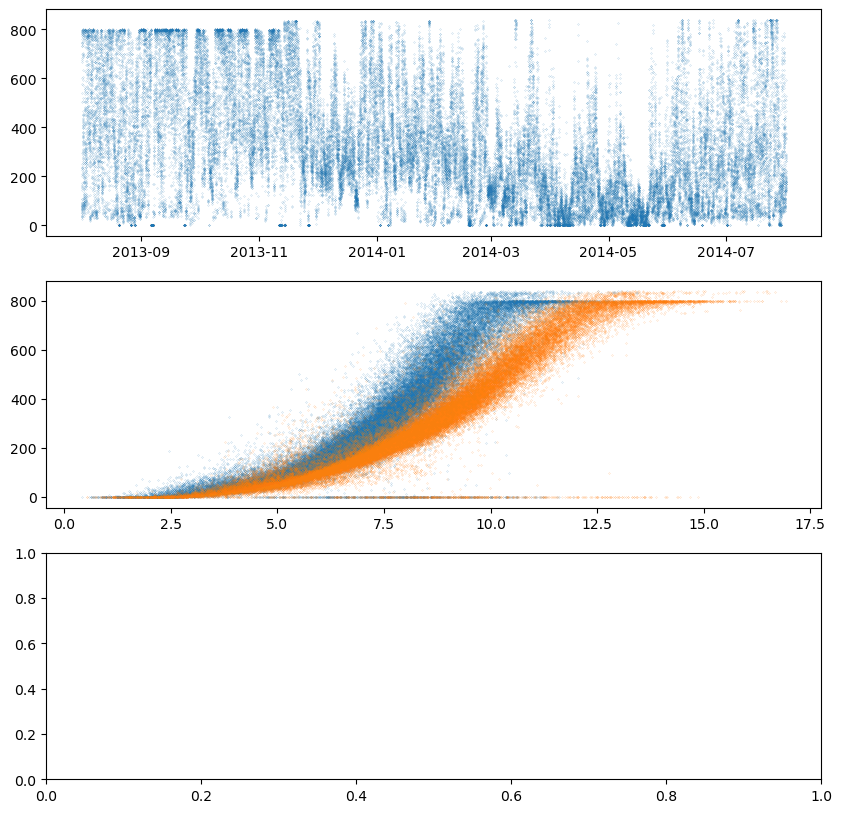

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].scatter(df.index,df['active_power_total'], s=0.01)
ax[1].scatter(df['wind_speed1'],df['active_power_total'], s=0.01)
ax[1].scatter(df['wind_speed2'],df['active_power_total'], s=0.01)

## FEATURE GENERATION